# Introdução
Nesta semana, implementamos uma solução de machine learning para o conhecido problema "Titanic - Machine Learning From Disaster", disponibilizado em forma de competição permanente no Kaggle, portal com conteúdo voltado para a Ciência de Dados. 

Seguimos os seguintes passos: 1) importação das bibliotecas necessárias; 2) leitura do dataset (disponibilizado no Kaggle); 3) pré-processamento dos dados; 4) criação de "features"; 5) seleção de "features"; 6) visualização; 7) agrupamento por sobreviventes (o que permitiu observar quais "features" eram mais relevantes para o resultado); 8) criação da tabela pivô (em relação à "feature" "Pclass"); 9) padronização das variáveis; 10 ) utilização dos modelos (Logistic Regression, Naive Bayes para Classificação, KNN para Classificação, SVM para Classificação, Decision Tree e Random Forest) e avaliação de seus respectivos desempenhos, obtidos por validação cruzada (método sklearn.model_selection.cross_val_score).

Dois aspectos do trabalho mereceram maior atenção: a escolha dos hiperparâmetros (tuning) e o e ensamble (conjugação) dos modelos.

In [1]:
# Importações necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
np.__version__

'1.22.4'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# carregamento do dataset de treino e teste

train = pd.read_csv('/content/drive/MyDrive/Datasets/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets/titanic/test.csv')

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# pre-processamento dos dados
# descrição estátistica das features núméricas

est = train.describe()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# verificar valores nulos ou NAN

print(train.isnull().sum())
print('-' * 18)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# mapear as colunas

col = pd.Series(list(train.columns))
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
X_test = test.drop(['PassengerId'], axis = 1)

In [10]:
# criar features

def criar_features(X):
  subs = {'female':1, 'male':0}
  X['mulher'] = X['Sex'].replace(subs) 
  
  X['Fare'] = X['Fare'].fillna(X['Fare'].mean())
  
  X['Age'] = X['Age'].fillna(X['Age'].mean())
  
  X['Embarked'] = X['Embarked'].fillna('S')
  
  subs = {'S':1, 'C':2, 'Q':3}
  X['porto'] = X['Embarked'].replace(subs)
  
  X['crianca'] = 1
  X['crianca'] = np.where(X['Age'] < 12, 1, 0)
  
  return X

X_train = criar_features(X_train)
X_test = criar_features(X_test)

In [11]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mulher,porto,crianca
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1,0
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0,1,0
887,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1,1,0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
889,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0,2,0


In [12]:
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mulher,porto,crianca
0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,0,3,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,1,1,0
2,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,0,3,0
3,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,0,1,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,0,1,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,1,2,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0
416,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,0,1,0


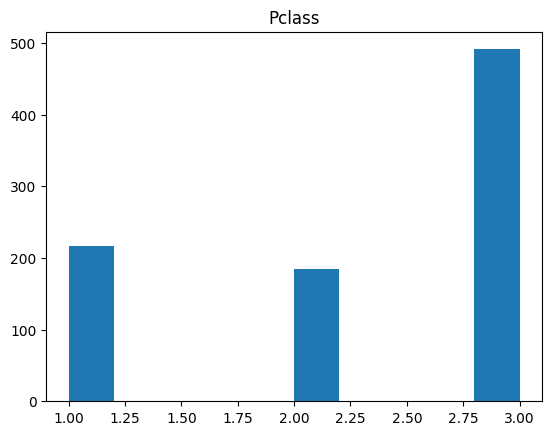

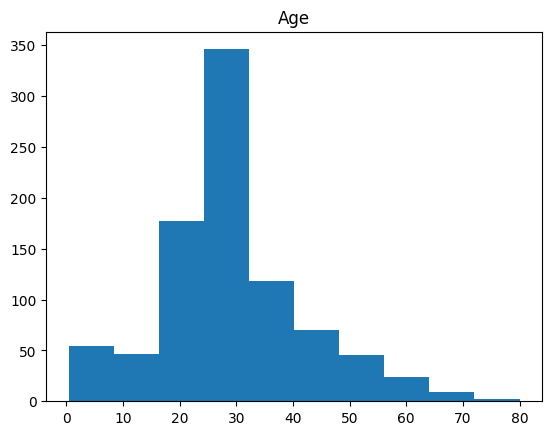

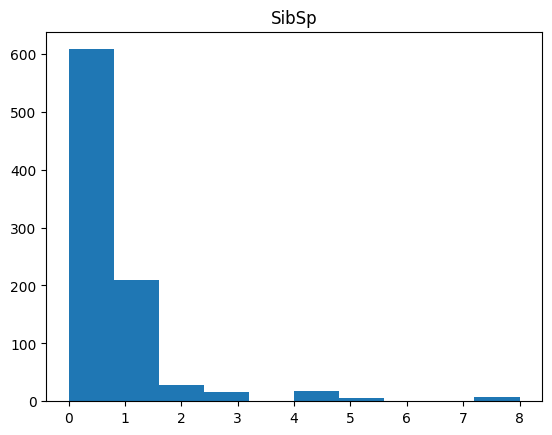

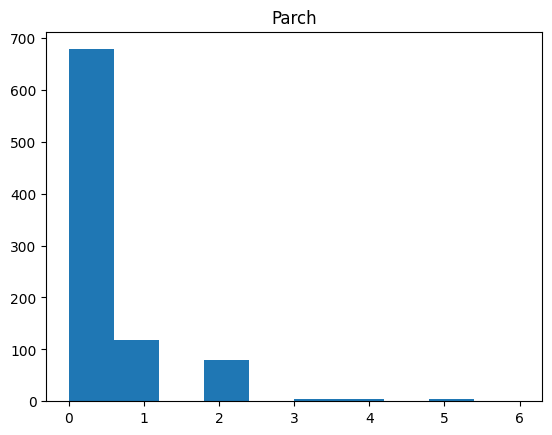

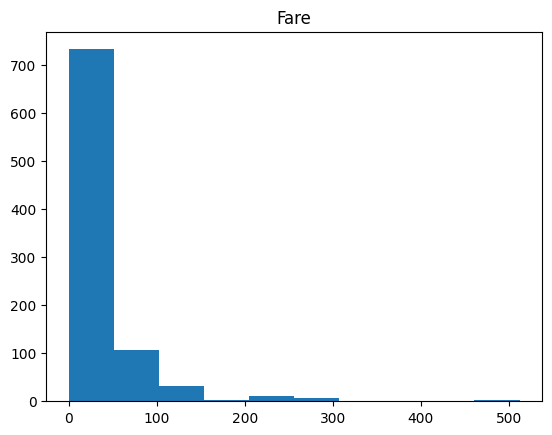

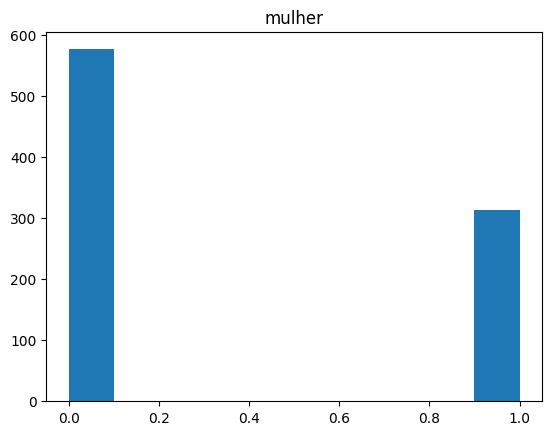

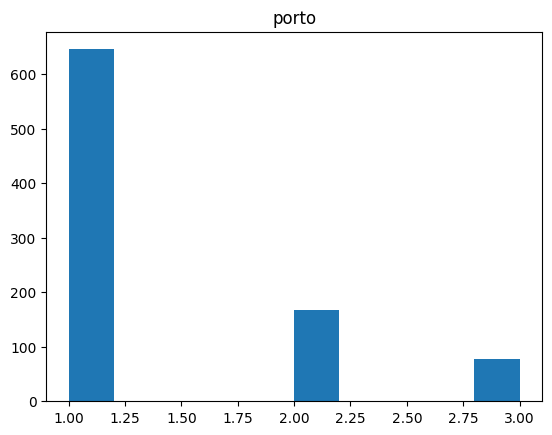

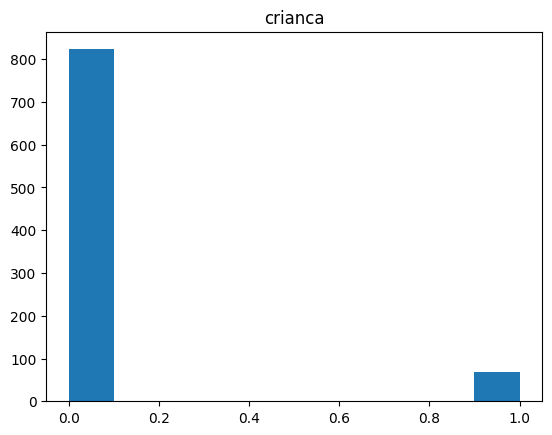

In [13]:
# Selecionar as features

features = ['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'mulher', 'porto', 'crianca']

X_train = X_train[features]
X_test = X_test[features]

y_train = train['Survived']


# Visualizações

for i in X_train.columns:
    plt.hist(X_train[i])
    plt.title(i)
    plt.show()

In [14]:
# Groupy

gp = train.groupby(['Survived']).count()
gp

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [15]:
# pivot_table

table = pd.pivot_table(train, index = ['Survived'], columns = ['Pclass'], values = 'PassengerId', aggfunc = 'count')
table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [16]:
# Padronização das variáveis

scaler = StandardScaler() #media 0 e desvio padrão 1
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
X_train_sc

array([[ 0.82737724, -0.5924806 ,  0.43279337, ..., -0.73769513,
        -0.56883712, -0.28744485],
       [-1.56610693,  0.63878901,  0.43279337, ...,  1.35557354,
         1.00518113, -0.28744485],
       [ 0.82737724, -0.2846632 , -0.4745452 , ...,  1.35557354,
        -0.56883712, -0.28744485],
       ...,
       [ 0.82737724,  0.        ,  0.43279337, ...,  1.35557354,
        -0.56883712, -0.28744485],
       [-1.56610693, -0.2846632 , -0.4745452 , ..., -0.73769513,
         1.00518113, -0.28744485],
       [ 0.82737724,  0.17706291, -0.4745452 , ..., -0.73769513,
         2.57919938, -0.28744485]])

In [18]:
X_test_sc

array([[ 0.82737724,  0.36944878, -0.4745452 , ..., -0.73769513,
         2.57919938, -0.28744485],
       [ 0.82737724,  1.33137817,  0.43279337, ...,  1.35557354,
        -0.56883712, -0.28744485],
       [-0.36936484,  2.48569343, -0.4745452 , ..., -0.73769513,
         2.57919938, -0.28744485],
       ...,
       [ 0.82737724,  0.67726619, -0.4745452 , ..., -0.73769513,
        -0.56883712, -0.28744485],
       [ 0.82737724,  0.04413122, -0.4745452 , ..., -0.73769513,
        -0.56883712, -0.28744485],
       [ 0.82737724,  0.04413122,  0.43279337, ..., -0.73769513,
         1.00518113, -0.28744485]])

# Modelos e validação cruzada

In [19]:
# Logistic Regression
model_lr = LogisticRegression (random_state= 0 )

score = cross_val_score(model_lr, X_train_sc, y_train, cv = 10)
print(np.mean(score))

0.8058302122347065


In [20]:
# Naive Bayes para Classificação

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

score = cross_val_score(model_nb, X_train_sc, y_train, cv = 10)
print(np.mean(score))

0.8036079900124845


In [21]:
# KNN para classificação
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors= 5, p = 2)

score = cross_val_score(model_knn, X_train_sc, y_train, cv = 10)
print(np.mean(score))

0.811498127340824


In [22]:
# SVM para classificação
from sklearn.svm import SVC
model_svc = SVC(C = 3, kernel = 'rbf', degree = 2, gamma = 0.1)

score = cross_val_score(model_svc, X_train_sc, y_train, cv = 10)
print(np.mean(score))

0.8316479400749064


In [23]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)

score = cross_val_score(model_dt, X_train_sc, y_train, cv = 10)
print(np.mean(score))

0.8170536828963796


In [24]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)

score = cross_val_score(model_rf, X_train_sc, y_train, cv = 10)
print(np.mean(score))

0.8261048689138576


In [25]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Otimização de hiperparâmetros

In [ ]:
# Skop e gp_minimize

from skopt import gp_minimize
def treinar_modelo(parametros): 
  model_rf = RandomForestClassifier(criterion = parametros[0], n_estimators = parametros[1], max_depth = parametros[2], 
                                    min_samples_split = parametros[3], min_samples_leaf = parametros[4], random_state = 0, n_jobs = -1 )
  
  score = cross_val_score(model_rf, X_train_sc, y_train, cv = 10) 
  mean_score = np.mean(score)
  print(np.mean(score))
  return -mean_score

parametros = [('entropy', 'gini'), # Ver documentação: tuplas e listas
              (100, 1000), 
              (3, 20),
              (2, 10),
              (1, 10)]

otimos = gp_minimize(treinar_modelo, parametros, random_state = 0, verbose = 1, n_calls = 30, n_random_starts = 10  )

Iteration No: 1 started. Evaluating function at random point.
0.8227465667915107
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 41.1476
Function value obtained: -0.8227
Current minimum: -0.8227
Iteration No: 2 started. Evaluating function at random point.
0.829450686641698
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 10.3769
Function value obtained: -0.8295
Current minimum: -0.8295
Iteration No: 3 started. Evaluating function at random point.
0.8249937578027466
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 13.0520
Function value obtained: -0.8250
Current minimum: -0.8295
Iteration No: 4 started. Evaluating function at random point.
0.8227340823970037
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 10.1219
Function value obtained: -0.8227
Current minimum: -0.8295
Iteration No: 5 started. Evaluating function at random point.
0.8272409488139825
Iteration No: 5 ended. Evaluation done at random point.
Time

In [ ]:
print(otimos.fun, otimos.x)

In [ ]:
# Ensanble model (Voting)

from sklearn.ensemble import VotingClassifier
model_voting = VotingClassifier(estimators = [('LR', model_lr), ('KNN', model_knn), ('SVC', model_svc), ('RF', model_rf)], voting = 'hard')

model_voting.fit(X_train_sc, y_train)
score = cross_val_score(model_voting, X_train_sc, y_train, cv = 10)
print(np.mean(score))

In [ ]:
# modelo final

model_rf = RandomForestClassifier(criterion = otimos.x[0], n_estimators = otimos.x[1], max_depth = otimos.x[2], 
                                    min_samples_split = otimos.x[3], min_samples_leaf = otimos.x[4], random_state = 0, n_jobs = -1 )

model_rf.fit(X_train_sc, y_train)
y_pred = model_rf.predict(X_train_sc)
mc = confusion_matrix(y_train, y_pred) 
print(mc)
score = model_rf.score(X_train_sc, y_train)
print(score)

In [ ]:
# Modelo final
# Predição nos dados de teste (depois do fit())

y_pred = model_voting.predict(X_test_sc)
submission = pd.DataFrame(test['PassengerId'])
submission['Survived'] = y_pred
submission.to_csv('submission.csv', index = False)

# Acréscimos

##Escolha dos hiperparâmetros
A otimização dos hiperparâmetros (tuning) foi feita com o método gp_minize da biblioteca scikit-optimize (skop). O método implementa a otimização bayesiana, usando processos gaussianos , para encontrar os hiperparâmetros ótimos, sendo computacionalmente mais eficiente do que a classe GridSearchCV, do Sklearn, que faz a busca exaustiva.



In [ ]:
# Otimização de hiperparâmetros dos dois outros modelos
# com bom desempenho: SVC e DecisionTreeClassifier

'''
Etapas:
1) Definir uma métrica que deverá ser minimizada pela função;
2) Definir o espaço de pesquisa dos hiperparametros;
3) Minimize o valor da funcão escolhida no item 1    
'''
#

# SVC
# SVC(C = 3, kernel = 'rbf', degree = 2, gamma = 0.1)

def treinar_modelo_svc (parametros_svc):
  
  model_svc = SVC(C = parametros_svc[0], kernel = parametros_svc [1], 
                  degree = parametros_svc[2], gamma = parametros_svc[3], 
                  random_state = 0)
  
  score = cross_val_score(model_svc, X_train_sc, y_train, cv = 10)
  mean_score = np.mean(score) 
  print(np.mean(score))
  return -mean_score

parametros_svc = [[1.0, 2.0], 
                  ['linear', 'rbf', 'sigmoid', 'poly'], 
                  [3], 
                  [ 0.1, 0.3],
                  ]


otimos_svc = gp_minimize(treinar_modelo_svc, parametros_svc, random_state = 0, verbose = 1, n_calls = 30, n_random_starts = 10)

print(otimos_svc.fun, otimos_svc.x)

# -0.8350187265917602 [1.0952758424481956, 'rbf', 3, 0.2998763351866045]

In [ ]:
# DecisionTreeClassifier
# DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 2, min_samples_leaf = 1, random_state = 0)

# Teste com tuplas 

def treinar_modelo_dtc (parametros_dtc):
  
  model_dtc = DecisionTreeClassifier(criterion = parametros_dtc[0], 
                                     max_depth = parametros_dtc[1],
                                     min_samples_split = parametros_dtc[2], 
                                     min_samples_leaf = parametros_dtc[3],
                                     random_state = 0)
  
  score = cross_val_score(model_dtc, X_train_sc, y_train, cv = 10) 
  mean_score = np.mean(score)
  print(np.mean(score))
  return -mean_score


parametros_dtc= [['gini', 'entropy', 'log_loss'], 
                  (2, 6), 
                  (2,5), 
                  (1, 3),
                  ]

otimos_dtc = gp_minimize(treinar_modelo_dtc, parametros_dtc, random_state = 0, verbose = 1, n_calls = 30, n_random_starts = 10)
print(otimos_dtc.fun, otimos_dtc.x)

# -0.8181772784019975 ['entropy', 3, 3, 2]

In [ ]:
# Modelos com os hiperparâmetros ótimos

# RandomForest
parametros = otimos.x
model_rf = RandomForestClassifier(criterion = parametros[0], 
                                  n_estimators = parametros[1], 
                                  max_depth = parametros[2], 
                                  min_samples_split = parametros[3], 
                                  min_samples_leaf = parametros[4], 
                                  random_state = 0, n_jobs = -1 )


# RandomSVC
parametros_svc = otimos_svc.x
model_svc = SVC(C = parametros_svc[0], kernel = parametros_svc [1], 
                 degree = parametros_svc[2], gamma = parametros_svc[3], 
                 random_state = 0)


# DecisionTree
parametros_dtc = otimos_dtc.x
model_dtc = DecisionTreeClassifier(criterion = parametros_dtc[0], 
                                    max_depth = parametros_dtc[1],
                                    min_samples_split = parametros_dtc[2], 
                                    min_samples_leaf = parametros_dtc[3],
                                    random_state = 0)

# Ensamble dos modelos
Para o ensamble dos modelos, após a obtenção dos hiperparâmetros ótimos, usamos a classe VotingClassifier.

A implementação foi feita da seguinte forma:

In [ ]:
# Ensanble model (Voting)

from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators = [('RF', model_rf),
                                              ('SVC', model_svc),
                                              ('DTC', model_dtc)], 
                                weights=[1, 2, 1],
                                voting='hard' )
                                              
model_voting.fit(X_train_sc, y_train)
score = cross_val_score(model_voting, X_train_sc, y_train, cv = 10)
print(np.mean(score))

# sem weights: 0.8339200998751561
# com weights: 0.8350062421972535

# Submissões no Kaggle

In [ ]:
# Predição com o modelo ensambled (Voting)

y_pred = model_voting.predict(X_test_sc)
submission = pd.DataFrame(test['PassengerId'])
submission['Survived'] = y_pred

submission.to_csv('submission_voting.csv', index = False)

In [36]:
# Submissão com o modelo SVC

model_svc.fit(X_train_sc, y_train)
score = cross_val_score(model_svc, X_train_sc, y_train, cv = 10)
print(np.mean(score))

y_pred = model_svc.predict(X_test_sc)
submission = pd.DataFrame(test['PassengerId'])
submission['Survived'] = y_pred
submission.to_csv('submission_svc.csv', index = False)

0.8350187265917602


# Resultado
O modelo combinado (model_voting) obteve o score de 0.77751 no Kaggle, conferindo-nos a posição nº 4499 no ranking,  às 11h54min de 9 jun. 2023.


# Referências
ANIFOWOSE, Fatai. Ensemble Machine Learning Explained in Simple Terms. Disponível em: <https://jpt.spe.org/twa/ensemble-machine-learning-explained-simple-terms>. Acesso em 10 jun. 2023.

CODERSCOLUMN. Scikit-Optimize: Simple Guide to Hyperparameters Tunning / Optimization. Disponível em: <https://coderzcolumn.com/tutorials/machine-learning/scikit-optimize-guide-to-hyperparameters-optimization>. Acesso em 10 jun. 2023.

KUMAR, Satyam. Use Voting Classifier to improve the performance of your ML model [Towardsdatascience]. Disponível em: <https://towardsdatascience.com/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e>. Acesso em: 10 jun. 2023.

SCIKIT-LEARN. Ensemble Methods. Disponível em: <https://scikit-learn.org/stable/modules/ensemble.html>. Acesso em 10 jun. 2023.

SCIKIT-OPTIMIZE. Disponível em <https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html#>. Acesso em 10 jun. 2023.

VALENTE, Domingos Sárvio Magalhães. ELT579 - Aula 8 VotingModel. Disponível em: <https://youtu.be/Fo5QLR8fyZw> . Acesso em 10 jun. 2023.